### In this notebook, we did some basic exploratory data analysis on the data we have
- Look at the time distribution of the data - add time features
- Look at the geographical distribution of the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
def day_type(x):
    if x == 6 or x == 0:
        return 1
    else:
        return 0

#### Add time features

In [3]:
train_raw = pd.read_csv('../data/train-parking.csv', parse_dates = [[3,4]], infer_datetime_format=True)
train_raw['Minute'] = train_raw.Date_Time.dt.minute
train_raw['Hour'] = train_raw.Date_Time.dt.hour
train_raw['Dow'] = train_raw.Date_Time.dt.weekday
train_raw['Year'] = train_raw.Date_Time.dt.year
train_raw['Month'] = train_raw.Date_Time.dt.month
train_raw['isweekend'] = train_raw['Dow'].apply(day_type)

In [4]:
test_raw = pd.read_csv('../data/test-no-label-parking.csv', parse_dates = [[3,4]], infer_datetime_format=True)
test_raw['Minute'] = test_raw.Date_Time.dt.minute
test_raw['Hour'] = test_raw.Date_Time.dt.hour
test_raw['Dow'] = test_raw.Date_Time.dt.weekday
test_raw['Year'] = test_raw.Date_Time.dt.year
test_raw['Month'] = test_raw.Date_Time.dt.month
test_raw['isweekend'] = test_raw['Dow'].apply(day_type)

In [6]:
train_raw['date'] = train_raw.Date_Time.dt.date
test_raw['date'] = test_raw.Date_Time.dt.date

In [7]:
train_raw.head()

,Date_Time,Street,From,To,Real.Spots,Street.Length,any_spot,Minute,Hour,Dow,Year,Month,isweekend,date
0,2014-01-07 16:19:00,Mission Street,25th Street,26th Street,4,179.132970,1,19,16,1,2014,1,0,2014-01-07
1,2014-01-18 20:42:00,Polk Street,Ellis Street,Olive Street,0,52.740210,0,42,20,5,2014,1,0,2014-01-18
2,2014-01-18 20:39:00,Van Ness Avenue,Geary Boulevard,Myrtle Street,0,52.517840,0,39,20,5,2014,1,0,2014-01-18
3,2014-01-18 20:38:00,Van Ness Avenue,Bush Street,Fern Street,0,52.405315,0,38,20,5,2014,1,0,2014-01-18
4,2014-01-18 20:38:00,Van Ness Avenue,Daniel Burnham Court,Post Street,0,52.191193,0,38,20,5,2014,1,0,2014-01-18


In [7]:
train_raw.shape,test_raw.shape

((1100, 14), (726, 12))

#### All street paris in test are in train

In [36]:
train_raw[['Street','From','To']].drop_duplicates().size, test_raw[['Street','From','To']].drop_duplicates().size

(288, 288)

In [43]:
train_raw[['Street','From','To']].drop_duplicates().values[1:5]

array([['Polk Street', 'Ellis Street', 'Olive Street'],
       ['Van Ness Avenue', 'Geary Boulevard', 'Myrtle Street'],
       ['Van Ness Avenue', 'Bush Street', 'Fern Street'],
       ['Van Ness Avenue', 'Daniel Burnham Court', 'Post Street']], dtype=object)

In [52]:
test_raw[['Street','From','To']].drop_duplicates().sort_values(['Street','From','To']).values\
== train_raw[['Street','From','To']].drop_duplicates().sort_values(['Street','From','To']).values

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ T

#### Average probability of finding a spot by street

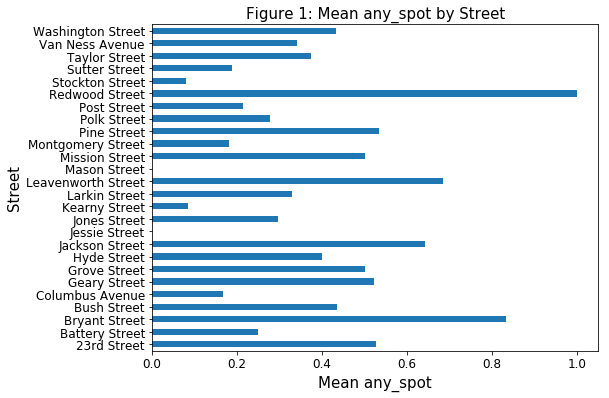

In [8]:
street_mean = train_raw.groupby(['Street'])['any_spot'].mean().plot('barh',figsize = (8,6),fontsize = 12)
plt.xlabel('Mean any_spot',fontsize = 15)
plt.ylabel('Street',fontsize = 15)
plt.title('Figure 1: Mean any_spot by Street', fontsize = 15)

#### Average probability of finding a spot by hour and day of week

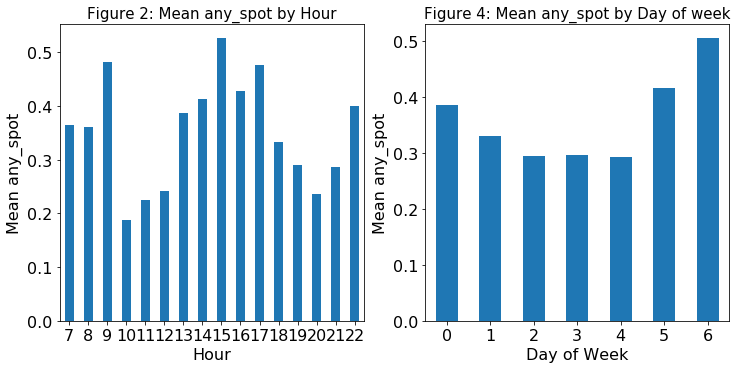

In [23]:
plt.figure(figsize = (12,12))
plt.subplot(221)
street_mean = train_raw.groupby(['Hour'])['any_spot'].mean().plot('bar', rot = 0,fontsize = 16)
plt.xlabel('Hour',fontsize = 16)
plt.ylabel('Mean any_spot',fontsize = 16)
plt.title('Figure 2: Mean any_spot by Hour', fontsize = 15)
plt.subplot(222)
street_mean = train_raw.groupby(['Dow'])['any_spot'].mean().plot('bar', rot = 0,fontsize = 16)
plt.xlabel('Day of Week',fontsize = 16)
plt.ylabel('Mean any_spot',fontsize = 16)
plt.title('Figure 4: Mean any_spot by Day of week', fontsize = 15)

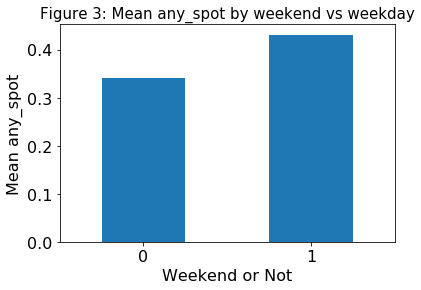

In [20]:
street_mean = train_raw.groupby(['isweekend'])['any_spot'].mean().plot('bar', rot = 0,fontsize = 16)
plt.xlabel('Weekend or Not',fontsize = 16)
plt.ylabel('Mean any_spot',fontsize = 16)
plt.title('Figure 3: Mean any_spot by weekend vs weekday', fontsize = 15)

### Geo Features

Look at how locations from different dataset overlap with each other.

In [10]:
train_geo = pd.read_csv('../data/train_longlat.csv')
train_latlng = train_geo[['lat','lng']]
train_latlng.head()

,lat,lng
0,37.750648,-122.418316
1,37.784040,-122.419381
2,37.785660,-122.421476
3,37.788499,-122.421892
4,37.787084,-122.421757


In [11]:
sensor_geo = pd.read_csv('../data/sensor_longlat.csv')
sensor_latlng = sensor_geo[['lat','lng']]
sensor_latlng.head()

,lat,lng
0,37.790007,-122.433902
1,37.791769,-122.434188
2,37.797099,-122.398361
3,37.796735,-122.399910
4,37.782793,-122.467643


In [12]:
park_geo = pd.read_csv('../data/parkingrecords.csv')[['lat','lon']]
park_latlng = pd.DataFrame({'lat':park_geo.lat, 'lng': park_geo.lon})
park_latlng = park_latlng.drop_duplicates()

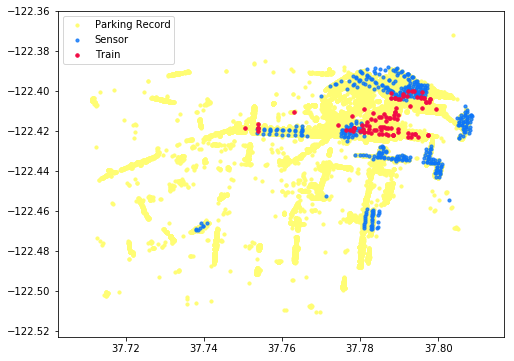

In [13]:
plt.figure(figsize = (8,6))
plt.scatter(park_latlng.lat,park_latlng.lng,c = '#fffd74',alpha=1, s=10)
plt.scatter(sensor_latlng.lat,sensor_latlng.lng,c = '#0d75f8',alpha=0.8, s=10)
plt.scatter(train_latlng.lat,train_latlng.lng,c = '#f10c45',alpha=1, s=12)
plt.legend(['Parking Record','Sensor','Train'])

### Seems that training locations are limited. We do not need to other at non-overlapping regions

In [209]:
train_latlng.describe()

,lat,lng
count,96.000000,96.000000
mean,37.785942,-122.413758
std,0.009961,0.007197
min,37.750648,-122.423180
25%,37.782333,-122.419683
50%,37.787795,-122.416725
75%,37.792295,-122.408122
max,37.799464,-122.399797


In [339]:
#Setting a limit to where we want to see these data
lat_min = 37.745
lat_max = 37.802
lng_min = -122.425
lng_max = -122.395

### Trimming the region of sensor data and parking meters by the limit of training geo data

In [372]:
park_filter = park_latlng[(park_latlng.lat>=lat_min) & (park_latlng.lat <= lat_max) &(park_latlng.lng>=lng_min) & (park_latlng.lng <= lng_max)]

In [262]:
sensor_filter = sensor_latlng[(sensor_latlng.lat>=lat_min) & (sensor_latlng.lat <= lat_max) &(sensor_latlng.lng>=lng_min) & (sensor_latlng.lng <= lng_max)]

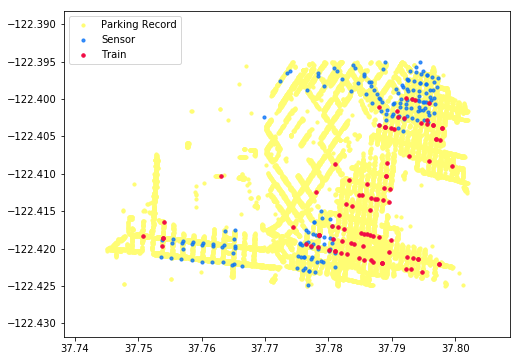

In [403]:
plt.figure(figsize = (8,6))
plt.scatter(park_filter.lat,park_filter.lng,c = '#fffd74',alpha=1, s=10)
plt.scatter(sensor_filter.lat,sensor_filter.lng,c = '#0d75f8',alpha=0.8, s=10)
plt.scatter(train_latlng.lat,train_latlng.lng,c = '#f10c45',alpha=1, s=12)
plt.legend(['Parking Record','Sensor','Train'])